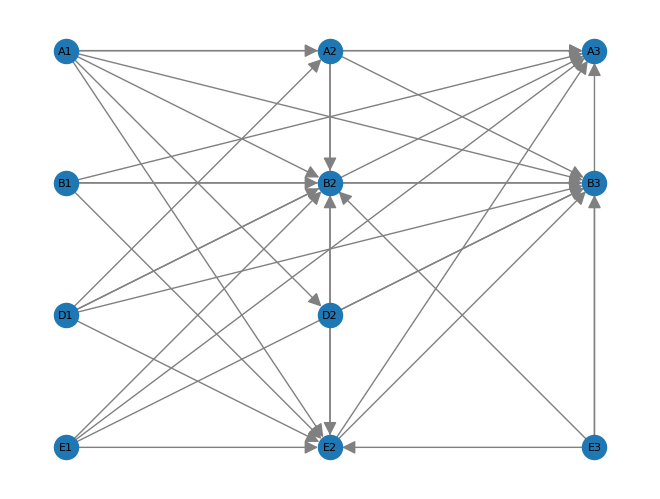

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_web_graph(graph):
    G = nx.DiGraph()

    for page, links in graph.items():
        G.add_node(page)
        for link in links:
            G.add_edge(page, link)

    Coordinates = {
        "A1": (0, 0),
        "A2": (1, 0),
        "A3": (2, 0),
        "B1": (0, -1),
        "B2": (1, -1),
        "B3": (2, -1),
        "D1": (0, -2),
        "D2": (1, -2),
        "E1": (0, -3),
        "E2": (1, -3),
        "E3": (2, -3),
    }

    nx.draw(G, Coordinates, with_labels=True, font_size=8, font_color='black', edge_color='gray', arrowsize=20)

    plt.show()

web_graph = {
    "A1": ["A2", "A3", "B2", "B3", "D2", "E2"],
    "A2": ["A3", "B2", "B3", "E2"],
    "A3": [],
    "B1": ["A3", "B2", "B3", "E2"],
    "B2": ["B3"],
    "B3": [],
    "D1": ["A2", "A3", "B2", "B3", "E2"],
    "D2": ["B3"],
    "E1": ["A3", "B2", "B3", "E2"],
    "E2": ["A3", "B2", "B3"],
    "E3": ["A3", "B2", "B3", "E2"],
}

plot_web_graph(web_graph)


In [15]:
import numpy as np
# الگوریتم مطابق جزوه
def pagerank(graph):
    
    num_pages = len(graph)

    Q = np.zeros((num_pages, num_pages))
    for i, page_url in enumerate(graph.keys()):
        for j, link_url in enumerate(graph.keys()):
            if len(graph[link_url]) != 0:
                if page_url in graph[link_url]:
                    Q[i, j] = 1 / len(graph[link_url])

    d = np.zeros((num_pages, 1))
    for i, page_url in enumerate(graph.keys()):
        if len(graph[page_url]) == 0:
            d[i, 0] = 1
    e = np.ones((num_pages, 1))
    P = Q + (1/num_pages) * e @ d.T

    alpha = 0.85
    A = alpha * P + (1-alpha) * (1/num_pages) * e @ e.T

    eigenvalues, eigenvectors = np.linalg.eig(A)

    # بردار ویژه متناظر با بزرگترین مقدار ویژه
    rank = eigenvectors[:, 0]

    # نرمال‌سازی بردار رتبه
    rank = rank / -np.sum(np.abs(rank))
    return A, eigenvalues, rank

In [16]:
A, eigenvalues, rank = pagerank(web_graph)

In [17]:
eigenvalues

array([ 1.00000000e+00+0.00000000e+00j, -2.06094942e-01+2.52078558e-01j,
       -2.06094942e-01-2.52078558e-01j, -2.21524283e-01+0.00000000e+00j,
       -5.67169225e-10+0.00000000e+00j,  5.67169213e-10+0.00000000e+00j,
       -6.17403786e-02+0.00000000e+00j, -2.66232611e-17+2.60337213e-17j,
       -2.66232611e-17-2.60337213e-17j,  3.50163508e-17+0.00000000e+00j,
        3.31463532e-34+0.00000000e+00j])

In [18]:
rank

array([0.04616953-0.j, 0.06055903-0.j, 0.13200482-0.j, 0.04616953-0.j,
       0.13200482-0.j, 0.28901259-0.j, 0.04616953-0.j, 0.05271021-0.j,
       0.04616953-0.j, 0.1028609 -0.j, 0.04616953-0.j])

In [19]:
A@rank

array([0.04616953+0.j, 0.06055903+0.j, 0.13200482+0.j, 0.04616953+0.j,
       0.13200482+0.j, 0.28901259+0.j, 0.04616953+0.j, 0.05271021+0.j,
       0.04616953+0.j, 0.1028609 +0.j, 0.04616953+0.j])

In [21]:
rank = np.real(rank)
for i, page_url in enumerate(web_graph.keys()):
    print(f"{page_url}: {rank[i]}")

A1: 0.04616952710840214
A2: 0.06055902972385415
A3: 0.13200481790878377
B1: 0.046169527108402206
B2: 0.1320048179087838
B3: 0.2890125917293618
D1: 0.046169527108402206
D2: 0.052710210115425815
E1: 0.046169527108402206
E2: 0.10286089707177959
E3: 0.046169527108402206
